# Análisis de Cervezas y StackOverflow

Este proyecto combina datos de recetas de cerveza artesanal con preguntas de StackOverflow para explorar posibles correlaciones y patrones interesantes entre ambos conjuntos de datos.

# Primera parte: Cervezas

Comenzamos con un dataset sobre cervezas [Brewer's Friend Beer Recipes](https://www.kaggle.com/jtrofe/beer-recipes) (recipeData.csv). En él podemos encontrar diferentes medidas sobre recetas de cerveza artesanal.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [45]:
# El CSV está en formato 'latin-1', así que habrá que importarlo de la siguiente manera:
beer_df = pd.read_csv("recipeData.csv", encoding='latin-1')


beer_df

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73856,73857,Amber Alfie 2,/homebrew/recipe/view/609673/amber-alfie-2,British Strong Ale,36,21.00,1.052,1.012,5.22,39.73,...,1.060,63.0,3.0,Specific Gravity,All Grain,1.25,20.00,NaN,NaN,59658.0
73857,73858,Rye IPA,/homebrew/recipe/view/610955/rye-ipa,Specialty IPA: Rye IPA,151,10.00,1.059,1.010,6.37,59.21,...,1.034,60.0,NaN,Specific Gravity,BIAB,0.50,22.00,NaN,NaN,NaN
73858,73859,SK-Kölsch,/homebrew/recipe/view/586891/,NaN,111,16.00,1.046,1.008,5.01,25.42,...,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,17.00,sucrose,140 g,82450.0
73859,73860,Flata Rødkløver,/homebrew/recipe/view/603788/,Irish Red Ale,92,24.00,1.051,1.014,4.82,25.65,...,1.043,72.0,NaN,Specific Gravity,All Grain,NaN,18.00,Sukkerlake,5 g sukker/l,NaN


In [46]:
beer_df.dtypes

BeerID             int64
Name              object
URL               object
Style             object
StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
UserId           float64
dtype: object

## Ejercicio 1

¿De qué estilo de cerveza se ha producido más?

In [47]:
# Contamos la frecuencia de cada estilo
style_counts = beer_df['Style'].value_counts().head(15)
style_counts



Style
American IPA              11940
American Pale Ale          7581
Saison                     2617
American Light Lager       2277
American Amber Ale         2038
Blonde Ale                 1753
Imperial IPA               1478
American Stout             1268
Irish Red Ale              1204
American Brown Ale         1152
Witbier                    1072
California Common Beer     1044
Weissbier                   988
Oatmeal Stout               961
Russian Imperial Stout      929
Name: count, dtype: int64

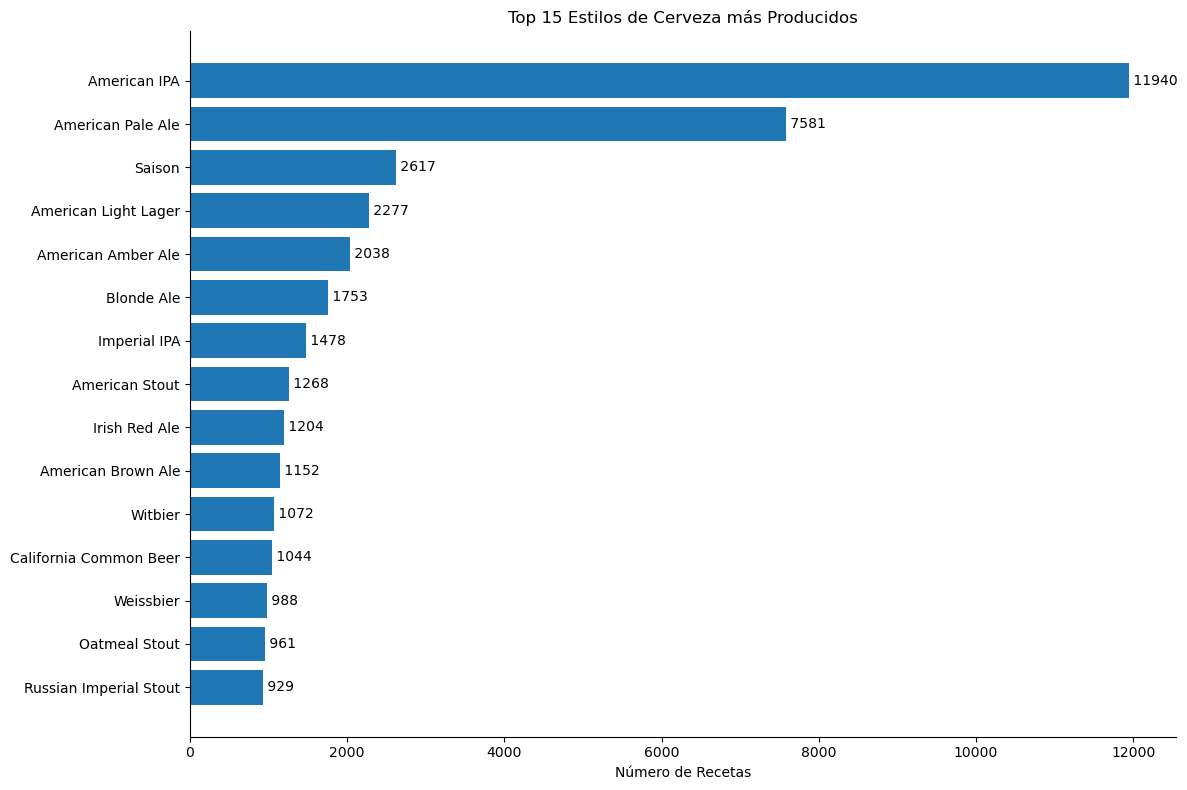

In [48]:
# Creamos la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Creamos las barras horizontales
bars = ax.barh(range(len(style_counts)), style_counts.values)

# Añadimos las etiquetas de los estilos
ax.set_yticks(range(len(style_counts)))
ax.set_yticklabels(style_counts.index)

# Añadimos los valores al final de cada barra
for i, v in enumerate(style_counts.values):
    ax.text(v, i, f' {v}', va='center')

# Personalizamos el gráfico
ax.set_title('Top 15 Estilos de Cerveza más Producidos')
ax.set_xlabel('Número de Recetas')

# Eliminamos los bordes superiores y derechos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Invertimos el eje y para que el más frecuente aparezca arriba
ax.invert_yaxis()

# Ajustamos el layout
plt.tight_layout()

plt.show()

## Ejercicio 2

En las cervezas de trigo (o Weissbier), ¿existe relación entre el amargor y su graduación?

PISTA para entender acrónimos: https://www.brewerybeerequipment.com/Blog/Decoding_Common_5_Beer_Acronyms_ABV__ABW_IBU__SRM__OG_FG_1437.html

In [49]:
# Filtramos valores nulos
mask = ~(beer_df['ABV'].isna() | beer_df['IBU'].isna())
filtered_df_w = beer_df[mask][['ABV', 'IBU', 'Style', 'Name']]
weissbier_df = filtered_df_w[filtered_df_w['Style'] == 'Weissbier']
weissbier_df


,ABV,IBU,Style,Name
642,5.21,11.97,Weissbier,Toombstone - Banana Wheat
1170,4.68,17.72,Weissbier,Solsvik Weissbier
1368,5.59,13.58,Weissbier,HefeWeizen Wed
2024,4.93,11.34,Weissbier,Erdinger Hefeweize Clone
2352,4.58,20.51,Weissbier,Honey Wheat
...,...,...,...,...
73531,4.91,15.28,Weissbier,Hefeweizen
73567,5.04,38.47,Weissbier,Pops-HopWeiss
73690,4.73,15.11,Weissbier,Weizenbier
73724,6.29,19.72,Weissbier,Awesome Recipe



Estadísticas de la relación ABV-IBU en Weissbier:
Correlación: 0.112
R²: 0.013


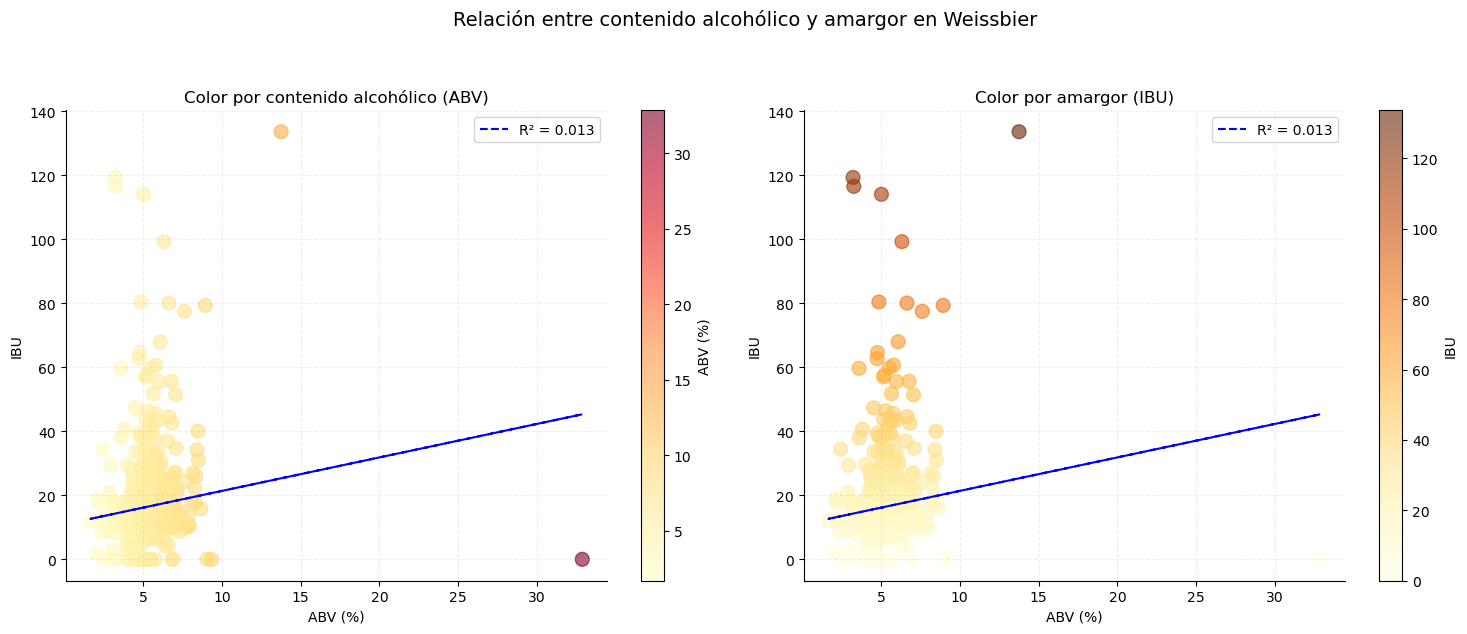

In [50]:
# Ejercicio 2: Relación entre ABV e IBU en Weissbier con mapa de calor
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Primer scatter: Color basado en ABV
scatter1 = ax1.scatter(weissbier_df['ABV'], weissbier_df['IBU'], 
                      c=weissbier_df['ABV'],
                      cmap='YlOrRd',  # Mapa de color de amarillo a rojo
                      s=100,
                      alpha=0.6)

# Añadimos línea de regresión
slope, intercept, r_value, p_value, std_err = stats.linregress(weissbier_df['ABV'], 
                                                              weissbier_df['IBU'])
line = slope * weissbier_df['ABV'] + intercept
ax1.plot(weissbier_df['ABV'], line, color='blue', linestyle='--', 
         label=f'R² = {r_value**2:.3f}')

# Configuramos primer gráfico
ax1.set_title('Color por contenido alcohólico (ABV)')
ax1.set_xlabel('ABV (%)')
ax1.set_ylabel('IBU')
fig.colorbar(scatter1, ax=ax1, label='ABV (%)')

# Segundo scatter: Color basado en IBU
scatter2 = ax2.scatter(weissbier_df['ABV'], weissbier_df['IBU'], 
                      c=weissbier_df['IBU'],
                      cmap='YlOrBr',  # Mapa de color de amarillo a marrón
                      s=100,
                      alpha=0.6)

# Añadimos línea de regresión
ax2.plot(weissbier_df['ABV'], line, color='blue', linestyle='--', 
         label=f'R² = {r_value**2:.3f}')

# Configuramos segundo gráfico
ax2.set_title('Color por amargor (IBU)')
ax2.set_xlabel('ABV (%)')
ax2.set_ylabel('IBU')
fig.colorbar(scatter2, ax=ax2, label='IBU')

# Configuración común para ambos gráficos
for ax in [ax1, ax2]:
    # Eliminamos bordes innecesarios
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Añadimos grid suave
    ax.grid(True, alpha=0.2, linestyle='--')
    
    # Añadimos leyenda
    ax.legend(loc='upper right')

# Título general
fig.suptitle('Relación entre contenido alcohólico y amargor en Weissbier', 
             fontsize=14, y=1.05)

# Ajustamos el layout
plt.tight_layout()

# Mostramos estadísticas
print(f"\nEstadísticas de la relación ABV-IBU en Weissbier:")
print(f"Correlación: {correlation:.3f}")
print(f"R²: {r_value**2:.3f}")

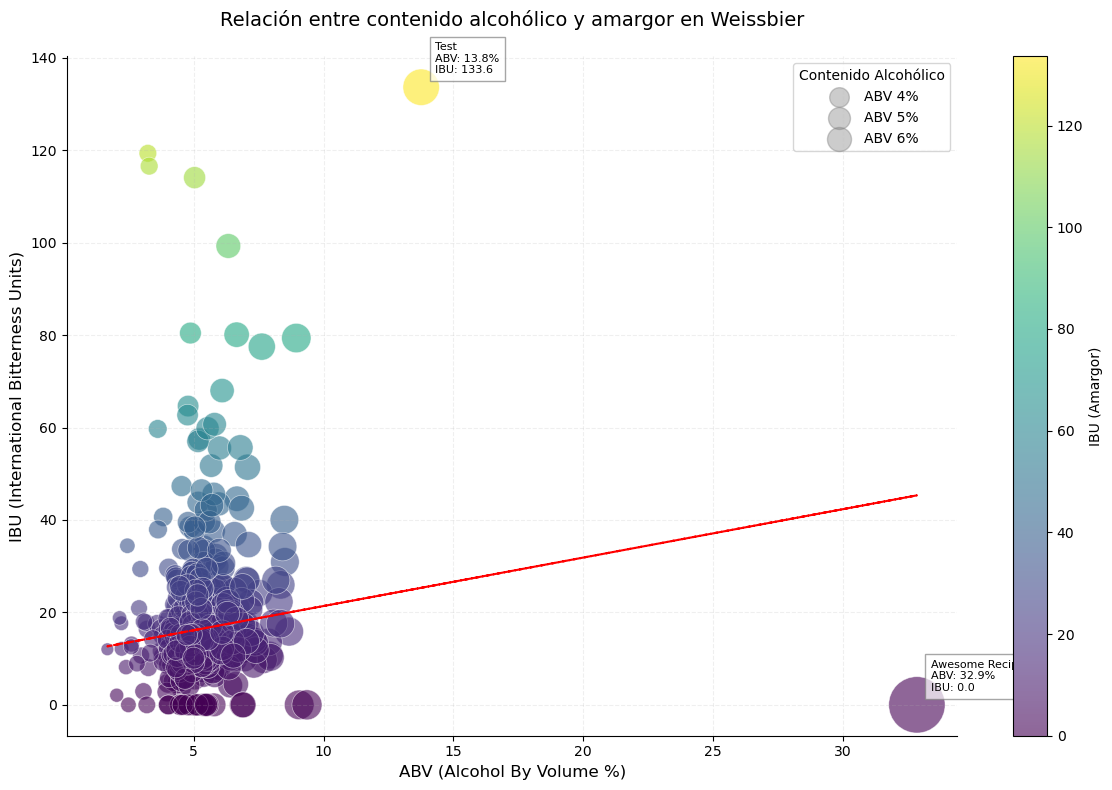


Estadísticas de la relación ABV-IBU en Weissbier:
Correlación: 0.112
R²: 0.013
Número de cervezas analizadas: 988
Rango de ABV: 1.7% - 32.9%
Rango de IBU: 0.0 - 133.6


In [51]:
# Ejercicio 2: Relación entre ABV e IBU en Weissbier con visualización combinada
fig, ax = plt.subplots(figsize=(12, 8))

# Creamos el scatter plot con tamaño variable según ABV y color según IBU
scatter = ax.scatter(weissbier_df['ABV'], 
                    weissbier_df['IBU'],
                    c=weissbier_df['IBU'],  # Color basado en IBU
                    s=weissbier_df['ABV']*50,  # Tamaño basado en ABV
                    cmap='viridis',  # Mapa de color que funciona bien para visualizar rangos
                    alpha=0.6,
                    edgecolor='white',
                    linewidth=0.5)

# Añadimos línea de regresión
slope, intercept, r_value, p_value, std_err = stats.linregress(weissbier_df['ABV'], 
                                                              weissbier_df['IBU'])
line = slope * weissbier_df['ABV'] + intercept
ax.plot(weissbier_df['ABV'], line, color='red', linestyle='--', 
        label=f'R² = {r_value**2:.3f}')

# Configuramos el gráfico
ax.set_title('Relación entre contenido alcohólico y amargor en Weissbier\n', 
             fontsize=14)
ax.set_xlabel('ABV (Alcohol By Volume %)', fontsize=12)
ax.set_ylabel('IBU (International Bitterness Units)', fontsize=12)

# Añadimos barra de color para IBU
colorbar = plt.colorbar(scatter)
colorbar.set_label('IBU (Amargor)', fontsize=10)

# Añadimos leyenda para el tamaño de los puntos
legend_elements = [plt.scatter([], [], s=50*i, c='gray', alpha=0.4, label=f'ABV {i}%')
                  for i in [4, 5, 6]]
ax.legend(handles=legend_elements, title='Contenido Alcohólico',
         loc='upper right', title_fontsize=10)

# Eliminamos bordes innecesarios
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadimos grid suave
ax.grid(True, alpha=0.2, linestyle='--')

# Anotamos algunos puntos interesantes
max_ibu = weissbier_df.loc[weissbier_df['IBU'].idxmax()]
max_abv = weissbier_df.loc[weissbier_df['ABV'].idxmax()]

for point in [max_ibu, max_abv]:
    ax.annotate(f"{point['Name']}\nABV: {point['ABV']:.1f}%\nIBU: {point['IBU']:.1f}",
                xy=(point['ABV'], point['IBU']),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7),
                fontsize=8)

plt.tight_layout()
plt.show()

# Mostramos estadísticas
print(f"\nEstadísticas de la relación ABV-IBU en Weissbier:")
print(f"Correlación: {correlation:.3f}")
print(f"R²: {r_value**2:.3f}")
print(f"Número de cervezas analizadas: {len(weissbier_df)}")
print(f"Rango de ABV: {weissbier_df['ABV'].min():.1f}% - {weissbier_df['ABV'].max():.1f}%")
print(f"Rango de IBU: {weissbier_df['IBU'].min():.1f} - {weissbier_df['IBU'].max():.1f}")

## Ejercicio 3

¿Cuáles son los estilos de cerveza más amargos? ¿Son todas las cervezas de esos estilos igual de amargas o hay mucha variabilidad?

/var/folders/0j/c164mtv91wq70n6m8ptmtmww0000gn/T/ipykernel_95960/261871920.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=top_bitter_df,


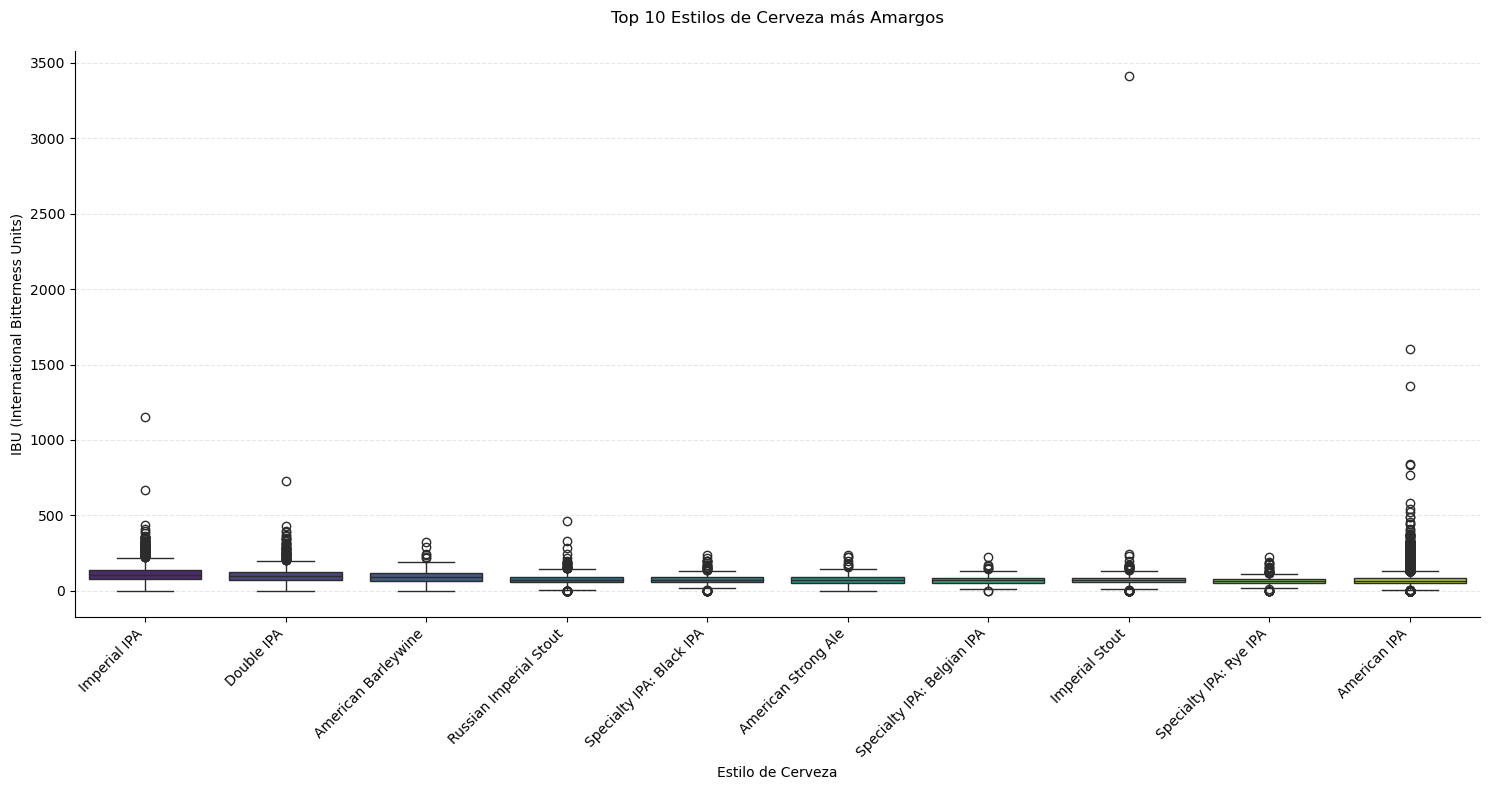


Estadísticas de los estilos más amargos:

Imperial IPA:
Mediana IBU: 103.8
Rango IBU: 0.0 - 1150.2
Desviación estándar: 71.5
Número de cervezas: 1478

Double IPA:
Mediana IBU: 97.2
Rango IBU: 0.0 - 728.9
Desviación estándar: 62.4
Número de cervezas: 864

American Barleywine:
Mediana IBU: 92.6
Rango IBU: 0.0 - 327.0
Desviación estándar: 46.2
Número de cervezas: 341

Russian Imperial Stout:
Mediana IBU: 73.5
Rango IBU: 0.0 - 460.8
Desviación estándar: 37.2
Número de cervezas: 929

Specialty IPA: Black IPA:
Mediana IBU: 73.3
Rango IBU: 0.0 - 239.7
Desviación estándar: 29.9
Número de cervezas: 638

American Strong Ale:
Mediana IBU: 72.2
Rango IBU: 0.0 - 238.2
Desviación estándar: 36.7
Número de cervezas: 227

Specialty IPA: Belgian IPA:
Mediana IBU: 71.7
Rango IBU: 0.0 - 223.3
Desviación estándar: 28.9
Número de cervezas: 221

Imperial Stout:
Mediana IBU: 71.0
Rango IBU: 0.0 - 3409.3
Desviación estándar: 132.1
Número de cervezas: 675

Specialty IPA: Rye IPA:
Mediana IBU: 66.9
Rango IBU: 0

In [52]:
# Filtramos valores nulos y calculamos estadísticas por estilo
mask = ~beer_df['IBU'].isna()
beer_ibu_df = beer_df[mask][['Style', 'IBU']]

# Calculamos la mediana de IBU por estilo
style_median_ibu = beer_ibu_df.groupby('Style')['IBU'].median().sort_values(ascending=False)

# Seleccionamos los 10 estilos más amargos (por mediana)
top_10_bitter_styles = style_median_ibu.head(10).index

# Filtramos el dataframe para incluir solo los 10 estilos más amargos
top_bitter_df = beer_ibu_df[beer_ibu_df['Style'].isin(top_10_bitter_styles)]

# Creamos el box plot
fig, ax = plt.subplots(figsize=(15, 8))

# Creamos el box plot con seaborn para un mejor estilo
import seaborn as sns
box_plot = sns.boxplot(data=top_bitter_df, 
                      x='Style', 
                      y='IBU',
                      order=top_10_bitter_styles,
                      palette='viridis')

# Rotamos las etiquetas para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Personalizamos el gráfico
plt.title('Top 10 Estilos de Cerveza más Amargos', pad=20)
plt.xlabel('Estilo de Cerveza')
plt.ylabel('IBU (International Bitterness Units)')

# Eliminamos los bordes superiores y derechos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadimos grid suave solo en el eje y
ax.yaxis.grid(True, linestyle='--', alpha=0.3)

# Ajustamos el layout para que no se corten las etiquetas
plt.tight_layout()

# Mostramos el gráfico
plt.show()

# Mostramos estadísticas detalladas
print("\nEstadísticas de los estilos más amargos:")
for style in top_10_bitter_styles:
    style_stats = beer_ibu_df[beer_ibu_df['Style'] == style]['IBU'].describe()
    print(f"\n{style}:")
    print(f"Mediana IBU: {style_stats['50%']:.1f}")
    print(f"Rango IBU: {style_stats['min']:.1f} - {style_stats['max']:.1f}")
    print(f"Desviación estándar: {style_stats['std']:.1f}")
    print(f"Número de cervezas: {style_stats['count']:.0f}")

/var/folders/0j/c164mtv91wq70n6m8ptmtmww0000gn/T/ipykernel_95960/1493380784.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=top_bitter_df,


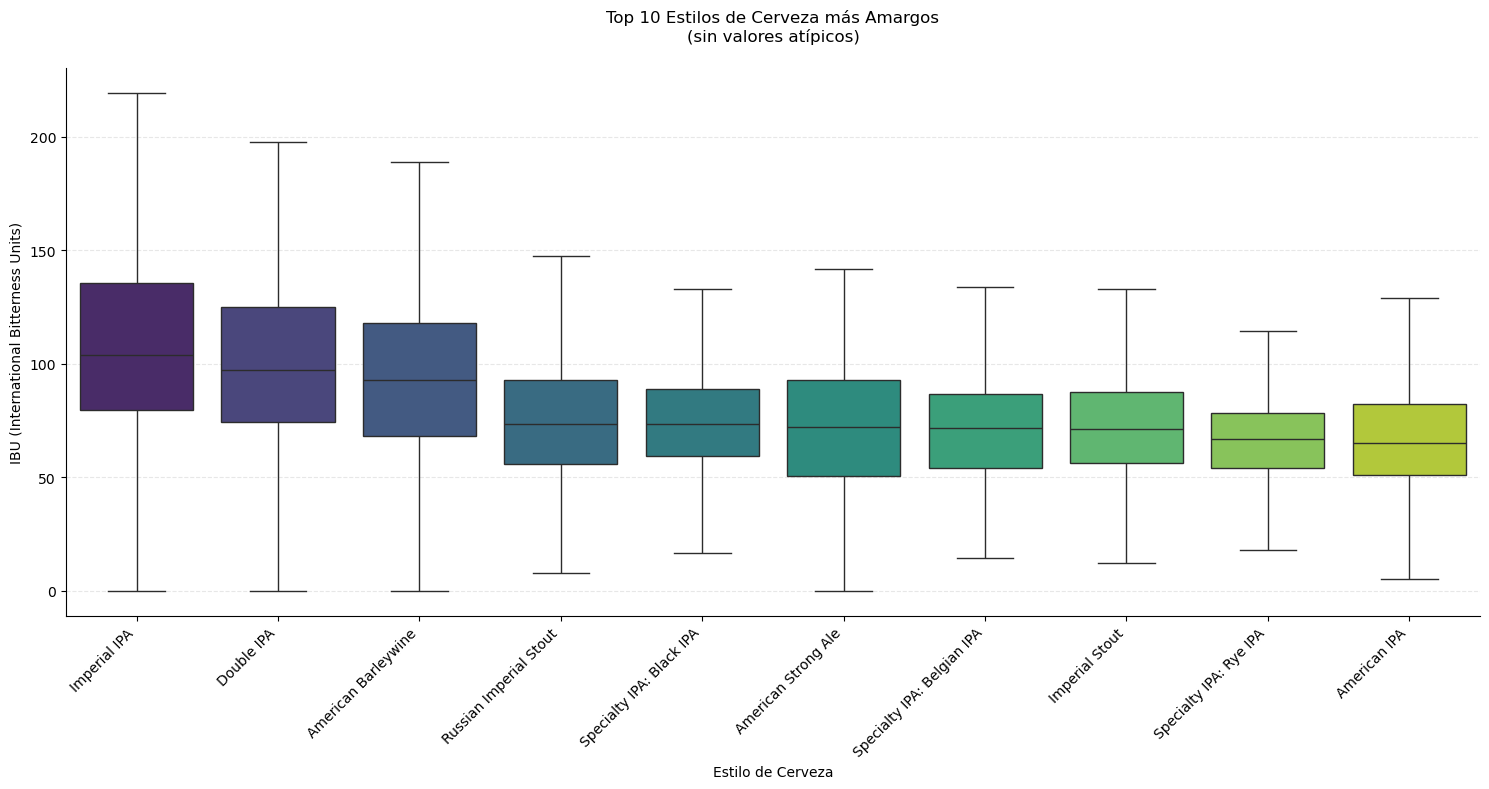


Estadísticas de los estilos más amargos (excluyendo valores atípicos):

Imperial IPA:
Rango típico IBU: 0.0 - 219.1
Mediana IBU: 100.3
Número de cervezas (sin outliers): 1358

Double IPA:
Rango típico IBU: 0.0 - 197.6
Mediana IBU: 93.7
Número de cervezas (sin outliers): 808

American Barleywine:
Rango típico IBU: 0.0 - 188.6
Mediana IBU: 90.7
Número de cervezas (sin outliers): 335

Russian Imperial Stout:
Rango típico IBU: 7.9 - 147.2
Mediana IBU: 74.3
Número de cervezas (sin outliers): 860

Specialty IPA: Black IPA:
Rango típico IBU: 16.8 - 132.8
Mediana IBU: 72.8
Número de cervezas (sin outliers): 603

American Strong Ale:
Rango típico IBU: 0.0 - 141.6
Mediana IBU: 69.9
Número de cervezas (sin outliers): 219

Specialty IPA: Belgian IPA:
Rango típico IBU: 14.5 - 133.9
Mediana IBU: 71.2
Número de cervezas (sin outliers): 213

Imperial Stout:
Rango típico IBU: 12.2 - 133.0
Mediana IBU: 71.5
Número de cervezas (sin outliers): 629

Specialty IPA: Rye IPA:
Rango típico IBU: 17.7 - 114.3
M

In [53]:
# Sin outliers

# Filtramos valores nulos y calculamos estadísticas por estilo
mask = ~beer_df['IBU'].isna()
beer_ibu_df = beer_df[mask][['Style', 'IBU']]

# Calculamos la mediana de IBU por estilo
style_median_ibu = beer_ibu_df.groupby('Style')['IBU'].median().sort_values(ascending=False)

# Seleccionamos los 10 estilos más amargos (por mediana)
top_10_bitter_styles = style_median_ibu.head(10).index

# Filtramos el dataframe para incluir solo los 10 estilos más amargos
top_bitter_df = beer_ibu_df[beer_ibu_df['Style'].isin(top_10_bitter_styles)]

# Creamos la figura
fig, ax = plt.subplots(figsize=(15, 8))

# Creamos el box plot sin outliers
box_plot = sns.boxplot(data=top_bitter_df, 
                      x='Style', 
                      y='IBU',
                      order=top_10_bitter_styles,
                      palette='viridis',
                      showfliers=False)  # Esta es la línea clave para eliminar outliers

# Rotamos las etiquetas para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Personalizamos el gráfico
plt.title('Top 10 Estilos de Cerveza más Amargos\n(sin valores atípicos)', pad=20)
plt.xlabel('Estilo de Cerveza')
plt.ylabel('IBU (International Bitterness Units)')

# Eliminamos los bordes superiores y derechos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadimos grid suave solo en el eje y
ax.yaxis.grid(True, linestyle='--', alpha=0.3)

# Ajustamos el layout
plt.tight_layout()

# Mostramos el gráfico
plt.show()

# Mostramos estadísticas resumidas sin outliers
print("\nEstadísticas de los estilos más amargos (excluyendo valores atípicos):")
for style in top_10_bitter_styles:
    style_data = top_bitter_df[top_bitter_df['Style'] == style]['IBU']
    
    # Calculamos los límites para los outliers
    Q1 = style_data.quantile(0.25)
    Q3 = style_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtramos los outliers
    normal_range = style_data[(style_data >= lower_bound) & (style_data <= upper_bound)]
    
    print(f"\n{style}:")
    print(f"Rango típico IBU: {normal_range.min():.1f} - {normal_range.max():.1f}")
    print(f"Mediana IBU: {normal_range.median():.1f}")
    print(f"Número de cervezas (sin outliers): {len(normal_range)}")

# Segunda parte: StackOverflow

Para la segunda parte del análisis, utilizaremos un dataset que almacena preguntas realizadas en StackOverflow, la fecha y un conjunto de etiquetas. [DataSet](https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate).

In [54]:
so_df = pd.read_csv("stackoverflow.csv")

so_df.sample(20)

,Id,Title,Body,Tags,CreationDate,Y
7874,38247362,How I can use docker-registry with login/passw...,<p>I have my docker-registry in localhost and ...,<docker><docker-registry>,2016-07-07 13:55:15,HQ
33299,50998754,"Hi i got this error in Laravel, please help me...","ErrorException thrown with message ""syntax err...",<laravel>,2018-06-23 06:57:59,LQ_EDIT
411,34686411,"C language, How can I Convert Number to String?",<p>if I've a large number stored in 10 bytes o...,<c><string><numbers>,2016-01-08 21:30:28,LQ_CLOSE
16287,41915282,Windows 10 Boot Linux without BIOS menu or USB...,"<p>I have Linux both command line linux, and U...",<linux><windows>,2017-01-28 21:55:41,LQ_CLOSE
6288,37444151,Docker: Set container name inside Dockerfile,<p>Is there a way that I can set what the cont...,<docker><dockerfile>,2016-05-25 17:38:38,HQ
15238,41411344,[Vue warn]: Cannot find element: #app,<p>I have a fresh installed laravel project wi...,<laravel><vue.js><laravel-5.3>,2016-12-31 20:00:56,HQ
16759,42114686,Is there a convenience constructor in C++?,<p>Is it possible for an overloaded constructo...,<c++><constructor><this><rvalue><constructor-o...,2017-02-08 13:39:38,HQ
4919,36685675,Unable to telnet to localhost,<p>While trying to telnet to localhost I get t...,<linux><telnet><ports>,2016-04-18 04:50:40,LQ_CLOSE
19527,43420813,PHP Login Code With Username Error,<p>I'm writing the code for a login. I've gott...,<php><html><login><admin>,2017-04-15 00:14:15,LQ_CLOSE
17056,42239548,"Tests Failed: 0 passed, 1 failed - Junit",[enter image description here][1]\r\n\r\n\r\n ...,<java><intellij-idea><junit>,2017-02-15 02:12:34,LQ_EDIT


## Ejercicio 4

¿Sigue aumentando la popularidad de StackOverflow o ha comenzado a descender?

In [55]:
# Convertimos la columna CreationDate a datetime
so_df['CreationDate'] = pd.to_datetime(so_df['CreationDate'])


# Agrupamos por año y mes, y contamos el número de preguntas
questions_per_month = so_df.groupby(pd.Grouper(key='CreationDate', freq='M')).size()

questions_per_month

/var/folders/0j/c164mtv91wq70n6m8ptmtmww0000gn/T/ipykernel_95960/1889545627.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  questions_per_month = so_df.groupby(pd.Grouper(key='CreationDate', freq='M')).size()


CreationDate
2016-01-31    1441
2016-02-29    1500
2016-03-31    1436
2016-04-30     908
2016-05-31    1270
2016-06-30    1080
2016-07-31    1066
2016-08-31    1232
2016-09-30    1470
2016-10-31    1340
2016-11-30    1323
2016-12-31    1175
2017-01-31    1178
2017-02-28    1251
2017-03-31    1306
2017-04-30    1084
2017-05-31    1069
2017-06-30    1094
2017-07-31     993
2017-08-31    1072
2017-09-30    1165
2017-10-31     787
2017-11-30     379
2017-12-31     725
2018-01-31    1147
2018-02-28    1007
2018-03-31    1141
2018-04-30    1039
2018-05-31     974
2018-06-30     882
2018-07-31     875
2018-08-31     765
2018-09-30     630
2018-10-31     670
2018-11-30     643
2018-12-31     573
2019-01-31     605
2019-02-28     579
2019-03-31     633
2019-04-30     590
2019-05-31     557
2019-06-30     520
2019-07-31     529
2019-08-31     553
2019-09-30     488
2019-10-31     515
2019-11-30     435
2019-12-31     454
2020-01-31     467
2020-02-29     385
Freq: ME, dtype: int64

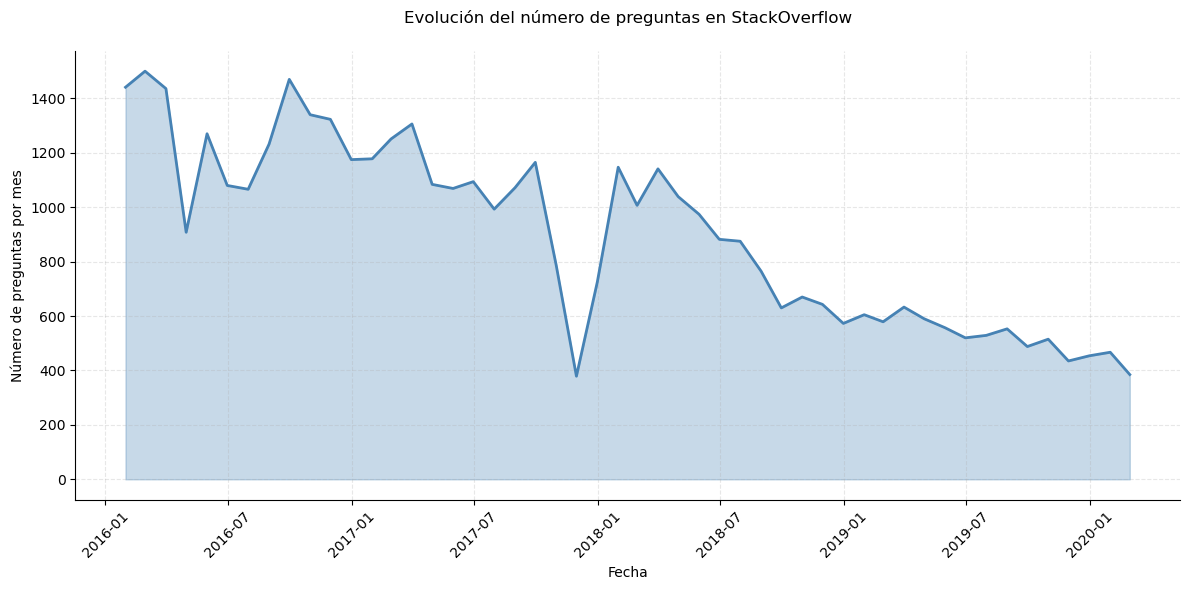

In [58]:
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Dibujamos la línea y el área sombreada
ax.plot(questions_per_month.index, 
        questions_per_month.values, 
        color='steelblue',
        linewidth=2)

# Añadimos el área sombreada
ax.fill_between(questions_per_month.index, 
                questions_per_month.values,
                alpha=0.3,
                color='steelblue')

# Personalizamos el gráfico
ax.set_title('Evolución del número de preguntas en StackOverflow', pad=20)
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de preguntas por mes')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Eliminamos los bordes superiores y derechos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Añadimos grid suave
ax.grid(True, linestyle='--', alpha=0.3)

# Ajustamos el layout
plt.tight_layout()

# Mostramos el gráfico
plt.show()

## Ejercicio 5

¿Existe alguna relación entre la tendencia de Python (`<python>`) y de R (`<r>`) que pudiera deberse a que los usuarios van de un lenguaje a otro?